In [18]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['AAPL','AMZN','GOOGL']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-1-1')['Adj Close'] 

In [20]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,AMZN,GOOGL
Date,,,
2020-01-02,73.785912,1898.010010,1368.680054
2020-01-03,73.068581,1874.969971,1361.520020
2020-01-06,73.650787,1902.880005,1397.810059
2020-01-07,73.304420,1906.859985,1395.109985
2020-01-08,74.483597,1891.969971,1405.040039


In [21]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,AMZN,GOOGL
Date,,,
2022-05-11,146.500000,2107.439941,2272.050049
2022-05-12,142.559998,2138.610107,2256.879883
2022-05-13,147.110001,2261.100098,2321.010010
2022-05-16,145.539993,2216.209961,2288.899902
2022-05-17,148.125000,2257.106934,2318.510010


<AxesSubplot:xlabel='Date'>

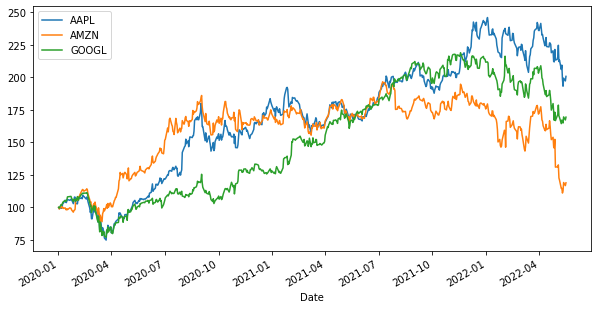

In [22]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [23]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [24]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.291341
AMZN     0.072441
GOOGL    0.220350
dtype: float64

In [25]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,AMZN,GOOGL
AAPL,0.135570,0.086737,0.086560
AMZN,0.086737,0.131277,0.076955
GOOGL,0.086560,0.076955,0.108071


In [26]:
log_returns.corr() #get correlation between each pair.

,AAPL,AMZN,GOOGL
AAPL,1.000000,0.65017,0.715122
AMZN,0.650170,1.00000,0.646080
GOOGL,0.715122,0.64608,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [27]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [28]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [29]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,AMZN,GOOGL
0,0.174007,0.327414,0.428268,0.518873,0.052858
1,0.206005,0.309393,0.272144,0.227603,0.500252
2,0.250126,0.330211,0.658604,0.114797,0.226599
3,0.208103,0.313169,0.391221,0.270577,0.338202
4,0.155710,0.311448,0.034635,0.453651,0.511714


In [30]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,AMZN,GOOGL
2995,0.193575,0.331027,0.541645,0.440994,0.017361
2996,0.190889,0.308929,0.124698,0.259037,0.616265
2997,0.181008,0.313622,0.307839,0.413741,0.278420
2998,0.223242,0.312931,0.380984,0.163310,0.455705
2999,0.159664,0.317208,0.240674,0.525805,0.233521


In [31]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,AMZN,GOOGL
429,0.188206,0.308236,0.167839,0.297883,0.534278
1917,0.188451,0.308239,0.179417,0.301779,0.518804
1423,0.186515,0.308243,0.159992,0.305545,0.534463
841,0.188072,0.308245,0.180247,0.304740,0.515012
2003,0.189850,0.308247,0.174738,0.290078,0.535184
...,...,...,...,...,...
1240,0.080337,0.356774,0.023464,0.957877,0.018659
1427,0.274781,0.358224,0.920258,0.073691,0.006050
838,0.279933,0.358552,0.924758,0.041018,0.034223
2417,0.275739,0.358555,0.923272,0.068658,0.008070


Text(0, 0.5, 'Expected Return')

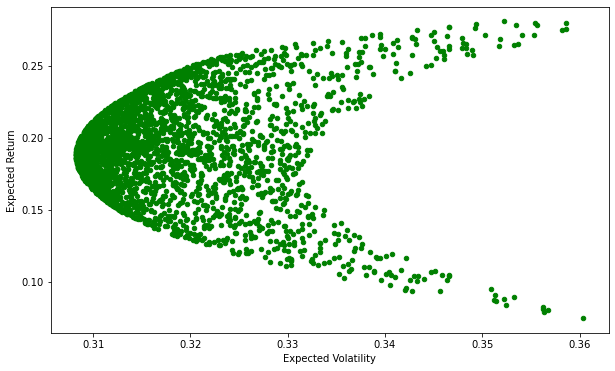

In [32]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6), c = 'g');
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [33]:
#generate path and name then export
path = 'csv_results/'
name = '_'.join(assets)
path_name = path + name  + '.csv'
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [34]:
# calculation & output
path_name2 = 'txt_results/' + name + '.txt'
f = open(path_name2, "a")

print("money amount calculation for demo use only, please don't simply invest on this results alone.", file=f)

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

# set money here 
total_investment = 50000
print("Intend to invest ${:.2f}".format(total_investment) + " total.", file=f)

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i], file=f)
    print("\t price @ ${:.2f} per share".format(pf_data.iloc[-1][i]), file=f)
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".", file=f)
    print("\t  represents {:.1f}% of total investment".format(sorted_portfolios[assets[i]].iloc[0] * 100), file=f)
    
print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%", file=f)
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%", file=f)

f.close()